# TTT4185 Machine learning for Speech technology

## Computer assigment 3a: Classification using Deep Neural Networks

This assignment assumes that the student has reviewed the material on deep neural networks.

In this assignment we will use the high level `Keras` framework together with `Tensorflow` to perform some deep learning experiments.

We will be using a small database of phonemes, where each phoneme is represented by the four first formant positions ("F1"-"F4") and their corresponding bandwidths ("B1"-"B4"). All numbers are in kHz. In addition, the speaker ID and the gender of the speaker are given for each phoneme.

The first few cells of this notebook contain example code to load and extract data, setup a simple network and train a deep neural network for classification. 

Note that we do not have a test dataset, but only training and validation sets. We do some experiments on the training set and observe the effect on the validation set.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

In [3]:
# Load data from CSV files 
rawtrain = pd.read_csv("Train.csv")
rawvalid = pd.read_csv("Validation.csv")

# Take a peek at the raw data
rawtrain.head(10)

,SpeakerID,Gender,Phoneme,F1,F2,F3,F4,B1,B2,B3,B4
0,cjf0,F,h#,0.701982,2.125440,2.433528,3.530050,0.264459,0.326273,0.300301,0.410096
1,cjf0,F,q,0.340942,2.594934,2.788244,4.028250,0.282159,0.471724,0.310578,0.505835
2,cjf0,F,iy,0.487078,2.605132,3.093409,4.354061,0.174520,0.340025,0.232818,0.413965
3,cjf0,F,v,0.505536,2.034326,2.804329,4.130655,0.190478,0.307295,0.301741,0.370238
4,cjf0,F,ih,0.524527,2.055382,2.989248,4.480000,0.164466,0.312337,0.301859,0.362134
5,cjf0,F,n,0.601591,2.046562,3.251497,4.561420,0.185757,0.334235,0.316704,0.381524
6,cjf0,F,eh,0.762154,2.127740,3.212496,4.412842,0.207840,0.303633,0.285026,0.384152
7,cjf0,F,n,0.714553,1.837149,3.218620,5.001730,0.252105,0.311876,0.333318,0.432281
8,cjf0,F,q,0.619766,2.276717,3.109751,4.658425,0.231525,0.314789,0.406002,0.417538
9,cjf0,F,ix,0.463761,2.181577,2.859900,4.327639,0.170244,0.319690,0.291556,0.425367


In [4]:
# We will be classifying three different vowels. Extract the training and validation data
phonemes = ["ae", "ey", "ux"]
train = rawtrain[rawtrain["Phoneme"].isin(phonemes)]
valid = rawvalid[rawvalid["Phoneme"].isin(phonemes)]
trainlabels = [phonemes.index(ph) for ph in train["Phoneme"]]
validlabels = [phonemes.index(ph) for ph in valid["Phoneme"]]

In [5]:
# Features to use
features = ["F1","F2"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = (x_train_raw - x_mean) / x_std
x_valid = (x_valid_raw - x_mean) / x_std

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

/Users/arthurtestard/envs/ntnu/signalp1/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3603: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [6]:
# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               768       
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 1539 (6.01 KB)
Trainable params: 1539 (6.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.0422 - accuracy: 0.4442 - val_loss: 1.0619 - val_accuracy: 0.4207
Epoch 2/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.9902 - accuracy: 0.5090 - val_loss: 1.0437 - val_accuracy: 0.4207
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.9558 - accuracy: 0.5090 - val_loss: 1.0062 - val_accuracy: 0

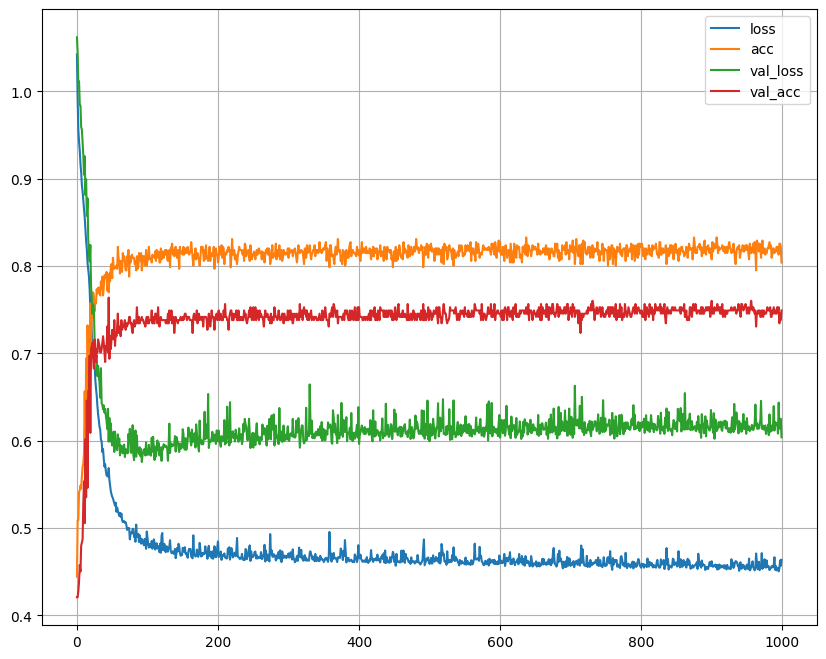

In [7]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [8]:
# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.603786051273346
Validation accuracy: 0.7490774989128113


## Problem 1
Increase the number of features to include "F3" and "F4" and rerun the experiments. Try also adding the bandwidths ("B1"-"B4").

Firstly, we add "F3" and "F4": 

In [9]:
features = ["F1","F2","F3","F4"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = (x_train_raw - x_mean) / x_std
x_valid = (x_valid_raw - x_mean) / x_std

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               1280      
                                                                 
 dense_3 (Dense)             (None, 3)                 771       
                                                                 
Total params: 2051 (8.01 KB)
Trainable params: 2051 (8.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
 1/18 [>.............................] - ETA: 2s - loss: 2.1618 - accuracy: 0.3125

/Users/arthurtestard/envs/ntnu/signalp1/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3603: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


18/18 [==============================] - 0s 4ms/step - loss: 1.2489 - accuracy: 0.4281 - val_loss: 1.1593 - val_accuracy: 0.4207
Epoch 2/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.9903 - accuracy: 0.5234 - val_loss: 1.0120 - val_accuracy: 0.4760
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.9273 - accuracy: 0.5881 - val_loss: 1.0134 - val_accuracy: 0.4502
Epoch 4/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.9042 - accuracy: 0.5935 - val_loss: 0.9547 - val_accuracy: 0.5756
Epoch 5/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.8740 - accuracy: 0.6601 - val_loss: 0.9556 - val_accuracy: 0.5387
Epoch 6/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.8511 - accuracy: 0.6457 - val_loss: 0.9135 - val_accuracy: 0.6015
Epoch 7/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.8367 - accuracy: 0.6565 - val_loss: 0.9068 - val_accuracy: 0.6162
Epoch 8/1000
18/18 

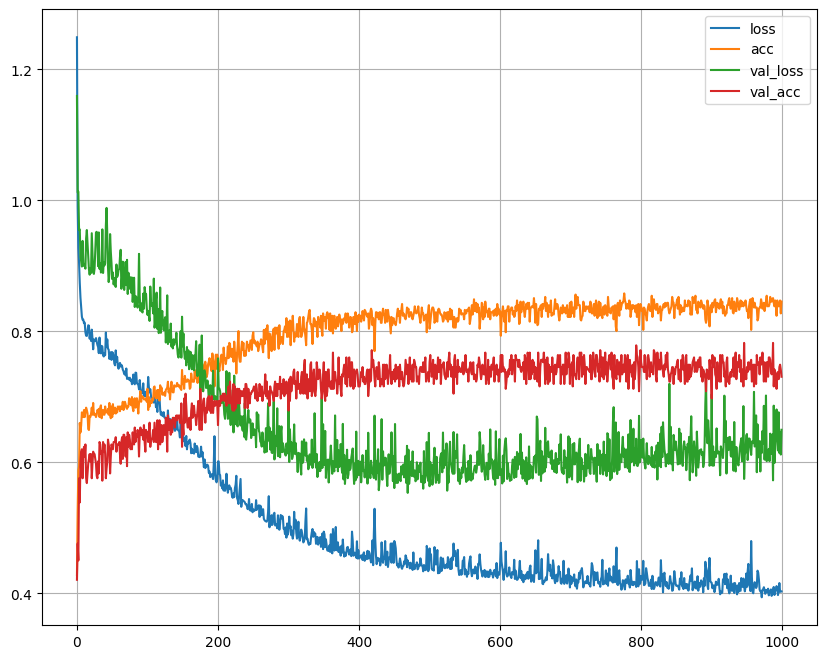

In [10]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [11]:
# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.6496807336807251
Validation accuracy: 0.7306272983551025


This version looks a bit overfitting (the loss which increase from 500 epochs).

Then, we add the bandwidths "B1"-"B4"

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               2304      
                                                                 
 dense_5 (Dense)             (None, 3)                 771       
                                                                 
Total params: 3075 (12.01 KB)
Trainable params: 3075 (12.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
 1/18 [>.............................] - ETA: 1s - loss: 3.2280 - accuracy: 0.6250

/Users/arthurtestard/envs/ntnu/signalp1/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3603: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


18/18 [==============================] - 0s 4ms/step - loss: 1.8311 - accuracy: 0.4263 - val_loss: 1.2788 - val_accuracy: 0.4502
Epoch 2/1000
18/18 [==============================] - 0s 2ms/step - loss: 1.1584 - accuracy: 0.4658 - val_loss: 1.0765 - val_accuracy: 0.4723
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.9841 - accuracy: 0.5719 - val_loss: 0.9643 - val_accuracy: 0.5646
Epoch 4/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.9329 - accuracy: 0.5594 - val_loss: 0.9480 - val_accuracy: 0.5055
Epoch 5/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.8876 - accuracy: 0.5809 - val_loss: 0.9648 - val_accuracy: 0.5609
Epoch 6/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.8794 - accuracy: 0.6205 - val_loss: 1.0212 - val_accuracy: 0.4613
Epoch 7/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.8891 - accuracy: 0.5737 - val_loss: 0.9342 - val_accuracy: 0.5424
Epoch 8/1000
18/18 

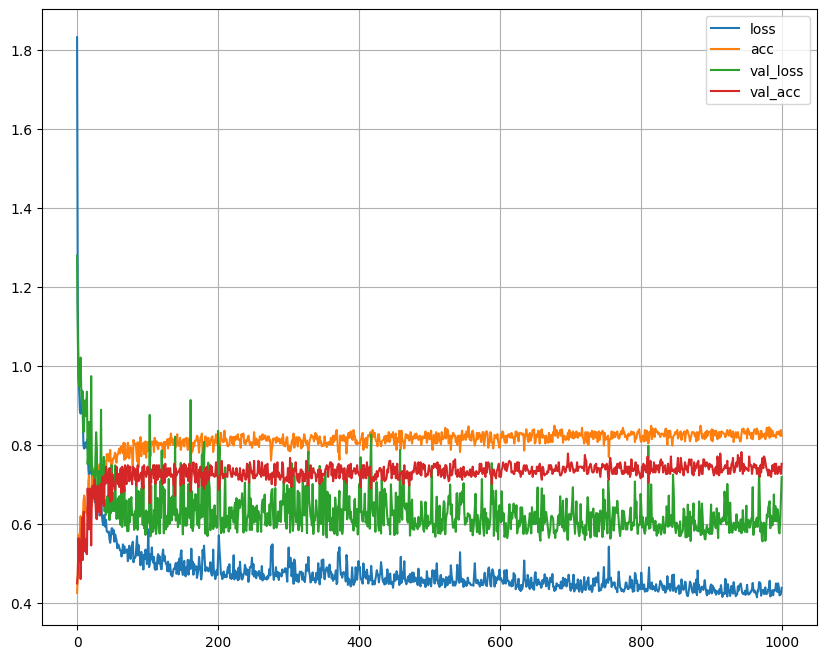

Validation loss: 0.7188396453857422
Validation accuracy: 0.7527675032615662


In [12]:
features = ["F1","F2","F3","F4","B1","B2","B3","B4"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = (x_train_raw - x_mean) / x_std
x_valid = (x_valid_raw - x_mean) / x_std

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Doesn't look like overfitting but the model doesn't look learning very quickly

## Problem 2
Change the number of nodes in the hidden layer and see how the results change. Try using dropout, and observe the results.

If we change the number of nodes:

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 512)               4608      
                                                                 


 dense_17 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 6147 (24.01 KB)
Trainable params: 6147 (24.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
 1/18 [>.............................] - ETA: 1s - loss: 4.2665 - accuracy: 0.3438

/Users/arthurtestard/envs/ntnu/signalp1/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3603: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


18/18 [==============================] - 0s 4ms/step - loss: 1.6444 - accuracy: 0.3903 - val_loss: 1.0870 - val_accuracy: 0.4317
Epoch 2/1000
18/18 [==============================] - 0s 1ms/step - loss: 1.1107 - accuracy: 0.4586 - val_loss: 1.0141 - val_accuracy: 0.4465
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.9641 - accuracy: 0.5072 - val_loss: 0.9600 - val_accuracy: 0.4908
Epoch 4/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.9020 - accuracy: 0.5791 - val_loss: 0.9721 - val_accuracy: 0.6531
Epoch 5/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.9195 - accuracy: 0.5917 - val_loss: 0.9468 - val_accuracy: 0.5166
Epoch 6/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.9019 - accuracy: 0.5540 - val_loss: 0.8771 - val_accuracy: 0.5572
Epoch 7/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.8465 - accuracy: 0.5971 - val_loss: 0.8577 - val_accuracy: 0.5720
Epoch 8/1000
18/18 

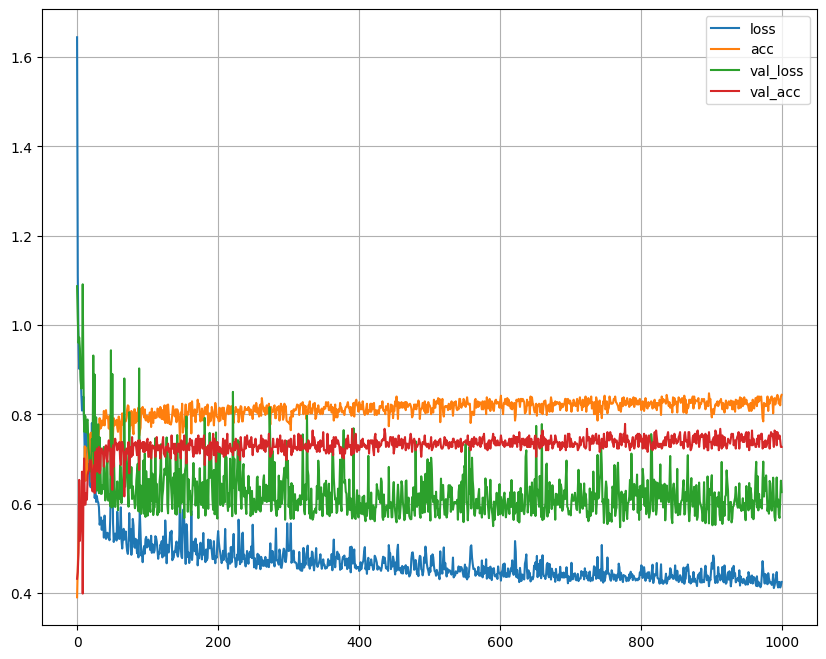

Validation loss: 0.6259120106697083
Validation accuracy: 0.7269372940063477


In [18]:
features = ["F1","F2","F3","F4","B1","B2","B3","B4"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = (x_train_raw - x_mean) / x_std
x_valid = (x_valid_raw - x_mean) / x_std

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

If we add dropout:

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 258)               2322      
                                                                 
 dropout (Dropout)           (None, 258)               0         
                                                                 
 dense_7 (Dense)             (None, 3)                 777       
                                                                 
Total params: 3099 (12.11 KB)
Trainable params: 3099 (12.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
 1/18 [>.............................] - ETA: 1s - loss: 4.3341 - accuracy: 0.5312

/Users/arthurtestard/envs/ntnu/signalp1/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3603: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


18/18 [==============================] - 0s 4ms/step - loss: 3.9722 - accuracy: 0.4101 - val_loss: 1.1742 - val_accuracy: 0.4649
Epoch 2/1000
18/18 [==============================] - 0s 1ms/step - loss: 3.3569 - accuracy: 0.4209 - val_loss: 1.1115 - val_accuracy: 0.4207
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 2.7459 - accuracy: 0.4029 - val_loss: 1.2708 - val_accuracy: 0.4207
Epoch 4/1000
18/18 [==============================] - 0s 1ms/step - loss: 2.4483 - accuracy: 0.4083 - val_loss: 1.2965 - val_accuracy: 0.4428
Epoch 5/1000
18/18 [==============================] - 0s 1ms/step - loss: 1.9377 - accuracy: 0.4460 - val_loss: 1.0104 - val_accuracy: 0.4539
Epoch 6/1000
18/18 [==============================] - 0s 1ms/step - loss: 1.4227 - accuracy: 0.4784 - val_loss: 0.9400 - val_accuracy: 0.5978
Epoch 7/1000
18/18 [==============================] - 0s 1ms/step - loss: 1.3667 - accuracy: 0.4299 - val_loss: 1.1250 - val_accuracy: 0.4428
Epoch 8/1000
18/18 

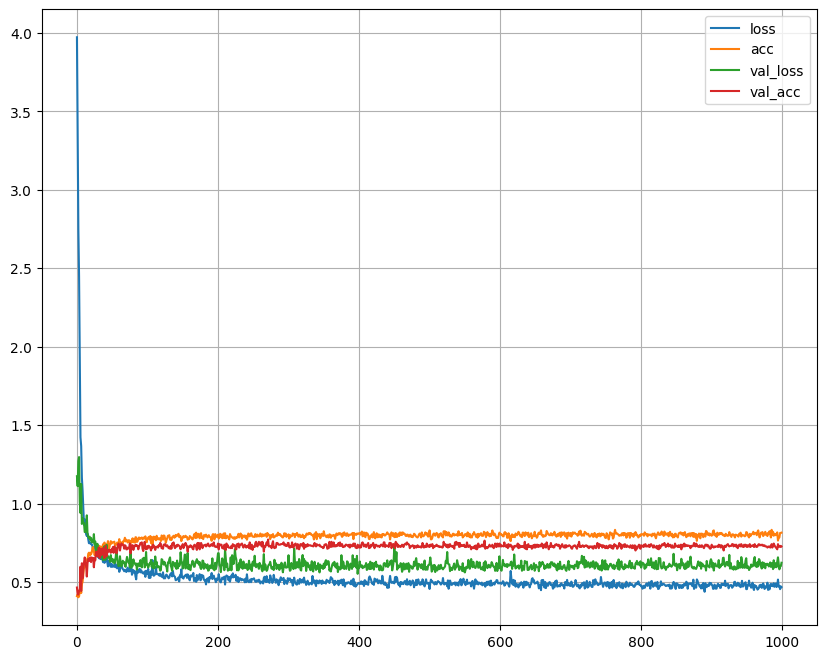

Validation loss: 0.6230080127716064
Validation accuracy: 0.7269372940063477


In [13]:
features = ["F1","F2","F3","F4","B1","B2","B3","B4"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = (x_train_raw - x_mean) / x_std
x_valid = (x_valid_raw - x_mean) / x_std

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(258, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 512)               4608      
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 6147 (24.01 KB)
Trainable params: 6147 (24.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
 1/18 [>.............................] - ETA: 1s - loss: 3.1346 - accuracy: 0.5312

/Users/arthurtestard/envs/ntnu/signalp1/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3603: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


18/18 [==============================] - 0s 4ms/step - loss: 2.8642 - accuracy: 0.4209 - val_loss: 1.7959 - val_accuracy: 0.4207
Epoch 2/1000
18/18 [==============================] - 0s 2ms/step - loss: 2.6544 - accuracy: 0.3687 - val_loss: 1.7850 - val_accuracy: 0.4207
Epoch 3/1000
18/18 [==============================] - 0s 2ms/step - loss: 2.2344 - accuracy: 0.4335 - val_loss: 2.0081 - val_accuracy: 0.4207
Epoch 4/1000
18/18 [==============================] - 0s 1ms/step - loss: 1.9630 - accuracy: 0.4335 - val_loss: 1.0024 - val_accuracy: 0.4649
Epoch 5/1000
18/18 [==============================] - 0s 1ms/step - loss: 1.4970 - accuracy: 0.4676 - val_loss: 0.9035 - val_accuracy: 0.5535
Epoch 6/1000
18/18 [==============================] - 0s 1ms/step - loss: 1.2434 - accuracy: 0.4982 - val_loss: 0.9019 - val_accuracy: 0.5609
Epoch 7/1000
18/18 [==============================] - 0s 1ms/step - loss: 1.1890 - accuracy: 0.4622 - val_loss: 0.8307 - val_accuracy: 0.6642
Epoch 8/1000
18/18 

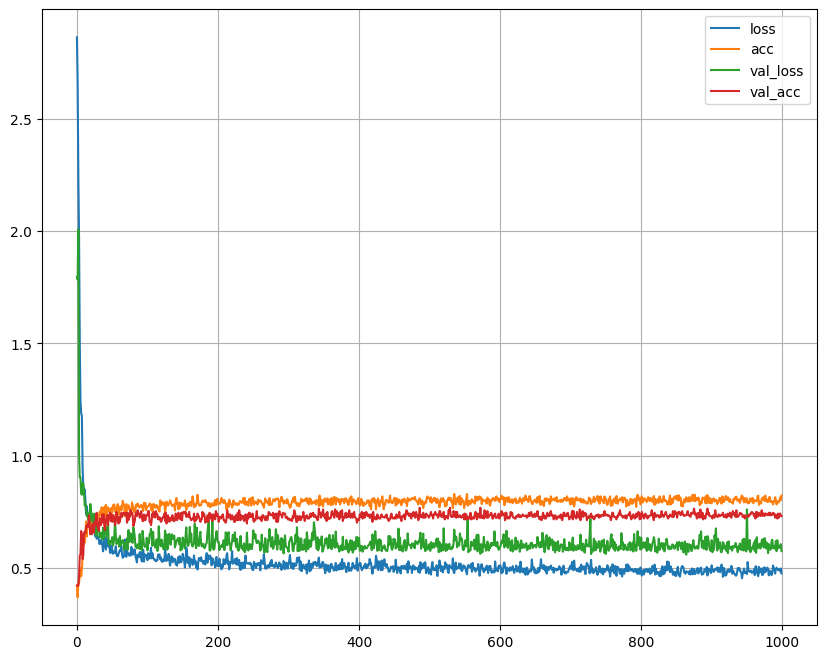

Validation loss: 0.5744808316230774
Validation accuracy: 0.7306272983551025


In [19]:
features = ["F1","F2","F3","F4","B1","B2","B3","B4"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = (x_train_raw - x_mean) / x_std
x_valid = (x_valid_raw - x_mean) / x_std

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

The validation loss decreases when we add both and the validation accuracy is slyghtly higher.

We can notice that it is our best result until now.

## Problem 3
Add multiple layers to the network and observe the results.

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 256)               2304      
                                                                 
 dense_21 (Dense)            (None, 128)               32896     
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 32)                2080      
                                                                 
 dense_24 (Dense)            (None, 3)                 99        
                                                                 
Total params: 45635 (178.26 KB)
Trainable params: 45635 (178.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
 1/

/Users/arthurtestard/envs/ntnu/signalp1/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3603: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


18/18 [==============================] - 0s 5ms/step - loss: 1.0816 - accuracy: 0.4748 - val_loss: 1.0329 - val_accuracy: 0.3875
Epoch 2/1000
18/18 [==============================] - 0s 2ms/step - loss: 1.0283 - accuracy: 0.4460 - val_loss: 1.0243 - val_accuracy: 0.4280
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.9803 - accuracy: 0.5234 - val_loss: 0.9876 - val_accuracy: 0.4428
Epoch 4/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.9404 - accuracy: 0.5360 - val_loss: 0.9938 - val_accuracy: 0.4280
Epoch 5/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.9096 - accuracy: 0.5468 - val_loss: 0.9721 - val_accuracy: 0.4391
Epoch 6/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.8242 - accuracy: 0.6457 - val_loss: 0.9040 - val_accuracy: 0.4945
Epoch 7/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.7707 - accuracy: 0.6547 - val_loss: 1.0754 - val_accuracy: 0.4834
Epoch 8/1000
18/18 

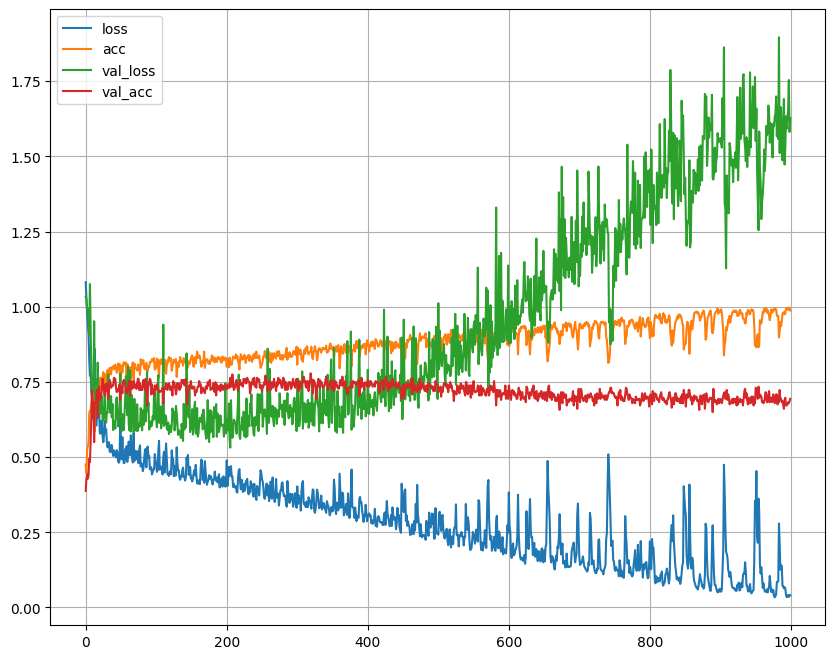

Validation loss: 1.6269019842147827
Validation accuracy: 0.6937269568443298


In [20]:
features = ["F1","F2","F3","F4","B1","B2","B3","B4"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = (x_train_raw - x_mean) / x_std
x_valid = (x_valid_raw - x_mean) / x_std

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    # keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation=tf.nn.relu),
    # keras.layers.Dropout(0.5),
    # keras.layers.Dense(128, activation=tf.nn.relu),
    # keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation=tf.nn.relu),
    # keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation=tf.nn.relu),
    # keras.layers.Dropout(0.5),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

We get over-fitting: the validation loss increases while the training loss decreases.

## Problem 4
Use the data to predict the gender of the speaker. Try including the format bandwidths as features as well ("B1"-"B4").

In [15]:
phonemes = ["ae", "ey", "ux"]
train = rawtrain[rawtrain["Phoneme"].isin(phonemes)]
valid = rawvalid[rawvalid["Phoneme"].isin(phonemes)]
trainlabels = [phonemes.index(ph) for ph in train["Phoneme"]]
validlabels = [phonemes.index(ph) for ph in valid["Phoneme"]]

train['Gender'] = train['Gender'].map({'M': 0, 'F': 1})
valid['Gender'] = valid['Gender'].map({'M': 0, 'F': 1})

/var/folders/dv/nzlg6jm168311nq7f93wfrd80000gn/T/ipykernel_7313/686891192.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Gender'] = train['Gender'].map({'M': 0, 'F': 1})
/var/folders/dv/nzlg6jm168311nq7f93wfrd80000gn/T/ipykernel_7313/686891192.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Gender'] = valid['Gender'].map({'M': 0, 'F': 1})


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               1152      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9473 (37.00 KB)
Trainable params: 9473 (37.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
 1/18 [>.............................] - ETA: 2s - loss: 0.7017 - accuracy: 0.6562

/Users/arthurtestard/envs/ntnu/signalp1/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3603: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


18/18 [==============================] - 0s 4ms/step - loss: 0.6569 - accuracy: 0.6421 - val_loss: 0.6224 - val_accuracy: 0.6568
Epoch 2/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.6195 - accuracy: 0.6637 - val_loss: 0.5781 - val_accuracy: 0.6753
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5650 - accuracy: 0.7320 - val_loss: 0.5334 - val_accuracy: 0.7934
Epoch 4/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5178 - accuracy: 0.7770 - val_loss: 0.4953 - val_accuracy: 0.8081
Epoch 5/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4639 - accuracy: 0.8165 - val_loss: 0.4524 - val_accuracy: 0.8303
Epoch 6/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4329 - accuracy: 0.8309 - val_loss: 0.4188 - val_accuracy: 0.8118
Epoch 7/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4049 - accuracy: 0.8363 - val_loss: 0.3957 - val_accuracy: 0.8303
Epoch 8/1000
18/18 

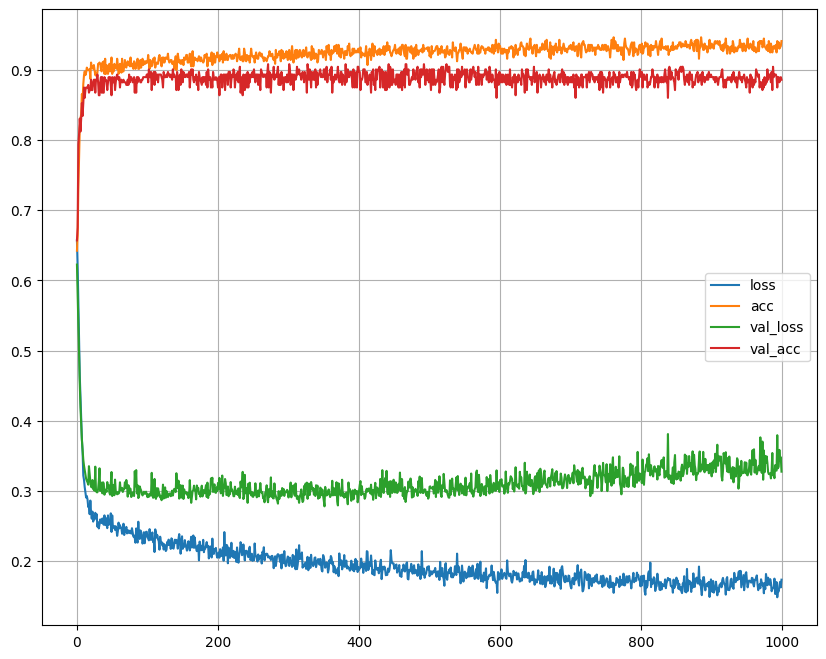

Validation loss: 0.32748425006866455
Validation accuracy: 0.8856088519096375


In [16]:
features = ["F1","F2","F3","F4","B1","B2","B3","B4"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
# y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
# y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

y_train = train['Gender'].values
y_valid = valid['Gender'].values


# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(64, activation=tf.nn.relu),
    # keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model.summary()

# Train the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

This result is not bad. However, we can see that the validation slightly increases. That could mean that the model is starting to overfit. 